In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Corrected from SVM to SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_excel(r"C:\Users\kajal\Downloads\Bankruptcy_data (4).xlsx")

In [10]:
df

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [12]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [13]:
#Handling Null Values
df.isna().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [14]:
df['Assets Growth'].fillna(df['Assets Growth'].mean(), inplace=True)
df['Liquidity'].fillna(df['Liquidity'].mean(), inplace=True)
df['Profitability'].fillna(df['Profitability'].mean(), inplace=True)
df['Productivity'].fillna(df['Productivity'].mean(), inplace=True)
df['Return on Equity'].fillna(df['Return on Equity'].mean(), inplace=True)
df['Market Book Ratio'].fillna(df['Market Book Ratio'].mean(), inplace=True)



In [15]:
df['Sales Growth'].fillna(df['Sales Growth'].median(), inplace=True)
df['Leverage Ratio'].fillna(df['Leverage Ratio'].median(), inplace=True)
df['Asset Turnover'].fillna(df['Asset Turnover'].median(), inplace=True)
df['Operational Margin'].fillna(df['Operational Margin'].median(), inplace=True)


In [16]:
df['Employee Growth'].fillna(df['Employee Growth'].mode()[0], inplace=True)


In [17]:
df = df.dropna()


In [18]:
df.isna().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [19]:
df[df.duplicated()].count()

EPS                   27
Liquidity             27
Profitability         27
Productivity          27
Leverage Ratio        27
Asset Turnover        27
Operational Margin    27
Return on Equity      27
Market Book Ratio     27
Assets Growth         27
Sales Growth          27
Employee Growth       27
BK                    27
dtype: int64

In [20]:
df = df.drop_duplicates()


In [21]:
df[df.duplicated()].count()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

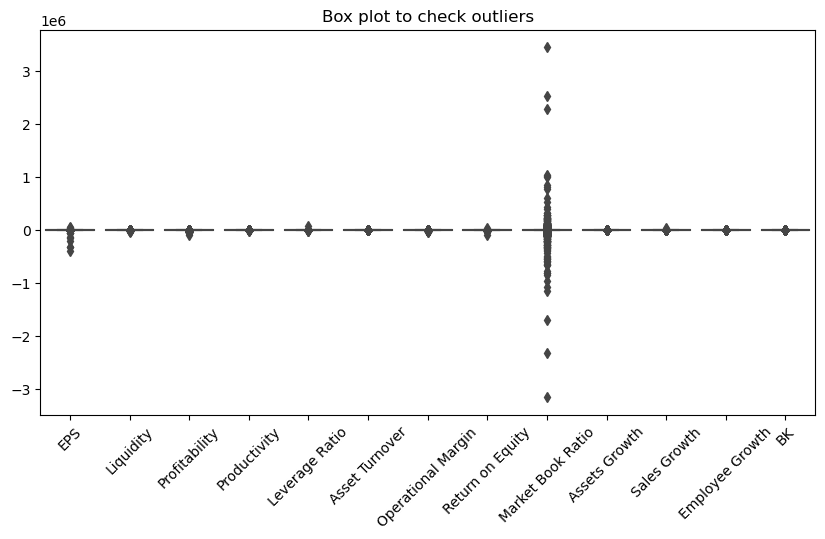

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box plot to check outliers')
plt.show()

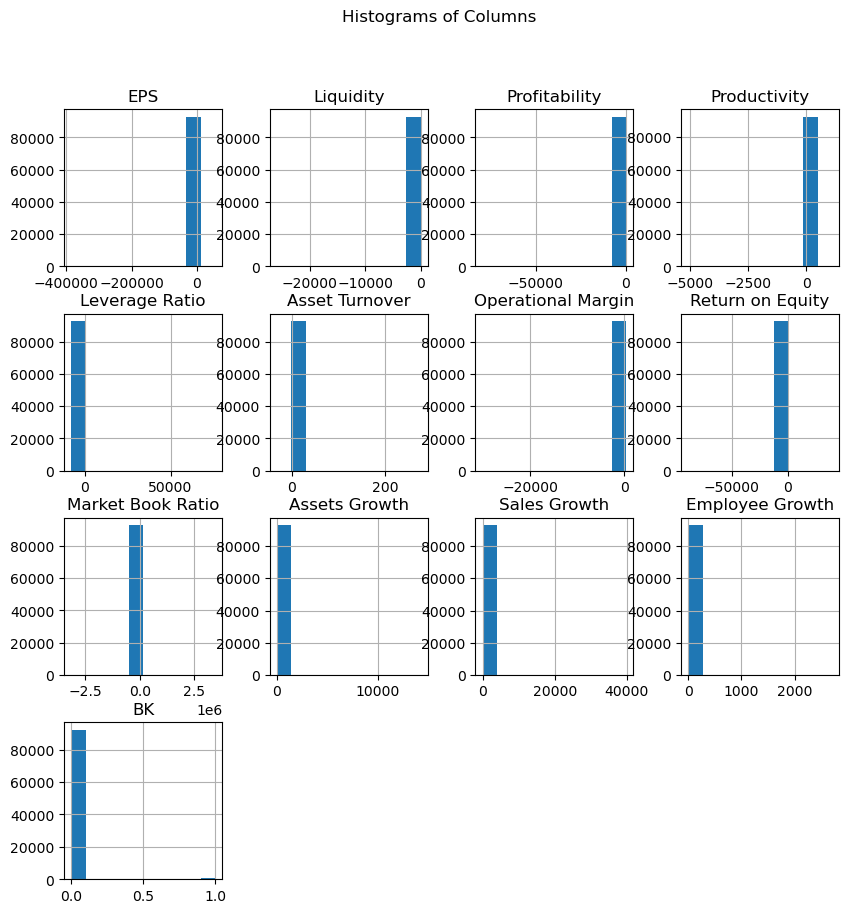

In [23]:
df.hist( figsize=(10, 10))
plt.suptitle('Histograms of Columns')
plt.show()

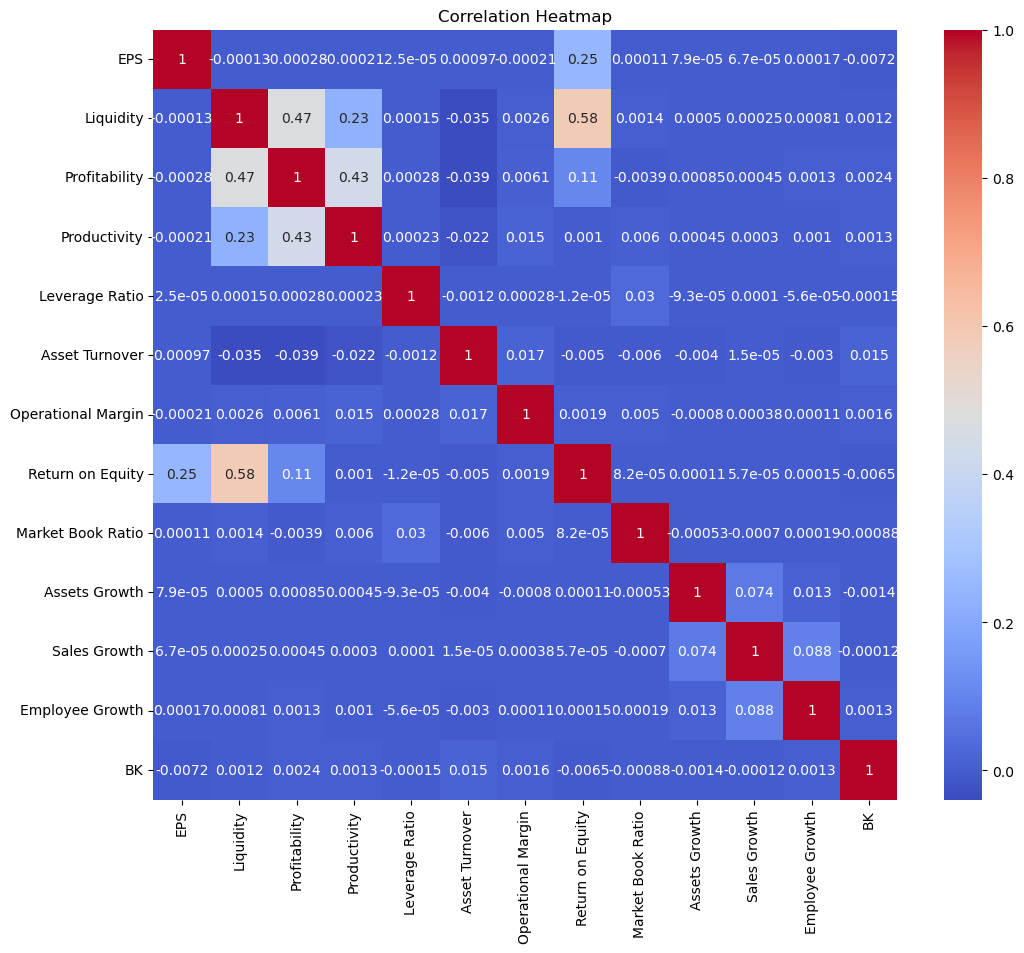

In [24]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
df.columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

<Axes: ylabel='Profitability'>

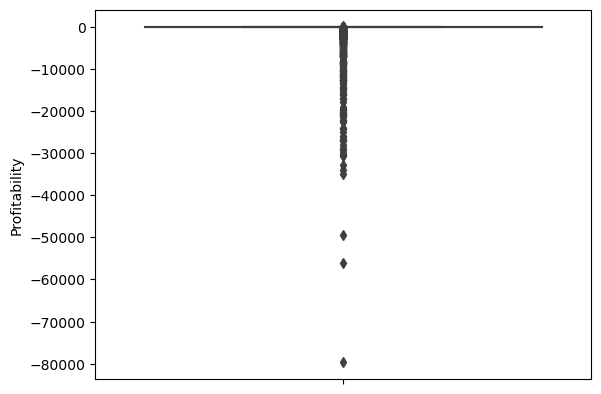

In [26]:
sns.boxplot(data = df , y='Profitability')

<Axes: ylabel='Sales Growth'>

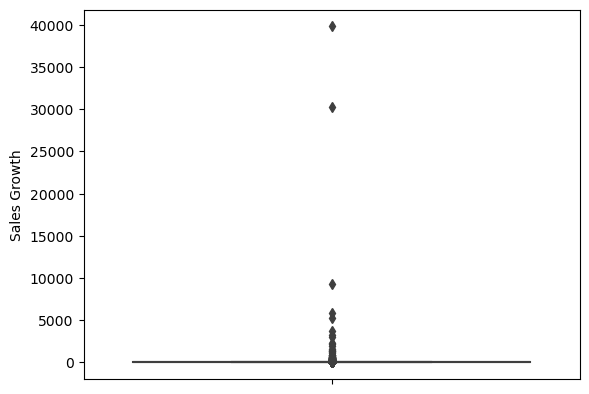

In [27]:
sns.boxplot(data = df , y='Sales Growth')

In [28]:
df.shape

(92840, 13)

In [29]:
X = df.drop('BK', axis=1)
y = df['BK']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from imblearn.over_sampling import SMOTE
X = df.drop('BK', axis=1)
y = df['BK']
    
    # Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
y.value_counts()

BK
0    92286
1      554
Name: count, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
modelRF = RandomForestClassifier()

In [38]:
modelRF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [39]:
predictionsRf = modelRF.predict(X_test_scaled)

In [40]:
print(classification_report(y_test,predictionsRf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18449
           1       0.98      1.00      0.99     18466

    accuracy                           0.99     36915
   macro avg       0.99      0.99      0.99     36915
weighted avg       0.99      0.99      0.99     36915



In [41]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [42]:
(accuracy_score(y_test,predictionsRf)*100).round()

99.0

In [43]:
model = SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [44]:
predictions = model.predict(X_test_scaled)

In [45]:
(accuracy_score(y_test,predictions)*100).round()

69.0

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70     18449
           1       0.70      0.65      0.68     18466

    accuracy                           0.69     36915
   macro avg       0.69      0.69      0.69     36915
weighted avg       0.69      0.69      0.69     36915



In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
modelLR = LogisticRegression(max_iter=1000)  # Increasing max_iter 
modelLR.fit(X_train_scaled, y_train)
predictionsLR = modelLR.predict(X_test_scaled)


In [49]:
print("\nLogistic Regression Classification Report")
print(classification_report(y_test, predictionsLR))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     18449
           1       0.68      0.62      0.65     18466

    accuracy                           0.66     36915
   macro avg       0.66      0.66      0.66     36915
weighted avg       0.66      0.66      0.66     36915

